In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
covid=pd.read_csv("covid_19_data.csv")
covid

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,154,154,154,154,165,165,165,166,166,167
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,21,21,21,21,22,22,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


In [4]:
#Since, the FIPS column is of no use for inference. We can Drop it.
df2 = covid.drop(['FIPS'],axis=1)
df3 = df2.drop(['Admin2'],axis=1)
df4 = df3.drop(['UID'],axis=1)
df5 = df4.drop(['code3'],axis=1)

In [7]:
drop_rows = ["iso3", "iso2", "Combined_Key", "Country_Region", "Lat", "Long_"]               # Removing useless columns, such as province codes
ht_df = df5.drop(drop_rows, axis = 1)
ht_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,154,154,154,154,165,165,165,166,166,167
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,22,22,22
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [22]:
data = ht_df.transpose().head()

In [23]:
data.rename(columns={'Province_State':'ObservationDate'}, inplace=True)

In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260
ObservationDate,American Samoa,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands,Alabama,Alabama,Alabama,Alabama,Alabama,...,Massachusetts,Missouri,Michigan,Michigan,Utah,Utah,Utah,Utah,Utah,Utah
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.ObservationDate['California']

AttributeError: 'DataFrame' object has no attribute 'ObservationDate'

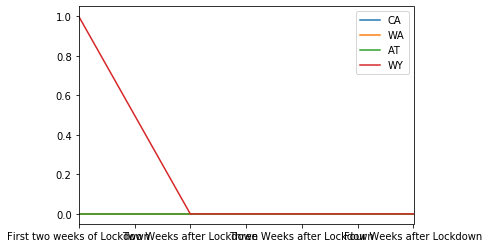

In [9]:
# Prediction
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                )
fig.show()